<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats;
import matplotlib.pyplot as plt;
import seaborn as sns;
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [4]:
data = pd.read_csv('../Data/dataFiles/Statistical_analysis_data_working.csv',
                     index_col=0)

In [5]:
data.shape

(5639, 101)

In [6]:
def check_and_drop_cols(df, cols):
    for i in cols:
        if i in df.columns:
            print(i, 'dropped')
            df = df.drop(i,axis =1)
    return df

In [7]:
data =check_and_drop_cols(data, ['Unnamed: 0.1','label_severity'])

In [8]:
data.describe()

,establishment_id,latitude_x,longitude_x,minimum_inspections_peryear,insp_year,insp_month,attributes.AcceptsInsurance,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.hipster,...,Sunday Start_time,Monday Close_time,Tuesday Close_time,Wednesday Close_time,Thursday Close_time,Friday Close_time,Saturday Close_time,Sunday Close_time,insp_day,insp_day_of_week
count,5.639000e+03,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,...,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000
mean,1.020526e+07,43.686765,-79.394460,2.158539,2017.826920,3.507714,0.004433,0.313708,0.011704,0.025182,...,10.467600,16.112776,16.097881,16.090256,15.959204,15.002829,14.800665,16.081389,15.395815,2.043802
std,5.802249e+05,0.049906,0.072521,0.626406,0.406814,2.101597,0.066442,0.464040,0.107561,0.156691,...,2.975278,7.483308,7.519813,7.528830,7.603862,8.056835,8.018504,7.207695,8.630018,1.360270
min,1.222807e+06,43.592176,-79.615416,1.000000,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.027183e+07,43.651063,-79.425187,2.000000,2018.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,16.038238,16.110406,16.106132,16.100851,15.000000,14.000000,16.106050,8.000000,1.000000
50%,1.045076e+07,43.665813,-79.393830,2.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,10.285729,18.000000,18.000000,18.000000,18.000000,16.138993,16.134140,18.000000,15.000000,2.000000
75%,1.055013e+07,43.711217,-79.361062,3.000000,2018.000000,5.000000,0.000000,1.000000,0.000000,0.000000,...,11.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,23.000000,3.000000
max,1.063750e+07,43.836683,-79.137254,3.000000,2018.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,31.000000,6.000000


In [9]:
list(pd.unique(data['severity']));

#### map severity to numerical values

In [10]:
data['severity'].value_counts()

NA - Not Applicable    2428
M - Minor              1914
S - Significant        1238
C - Crucial              59
Name: severity, dtype: int64

In [11]:
data['num_severity'] = ''

In [12]:
map_dict = dict(zip(list(pd.unique(data['severity'])), [2, 1, 0, 3]))

In [13]:
data['num_severity'] = data['severity'].map(map_dict)

In [14]:
data['num_severity'].value_counts()

0    2428
1    1914
2    1238
3      59
Name: num_severity, dtype: int64

#### Get Correlation Matrix

In [15]:
corr_mat = data.corr()

In [16]:
corr_mat.shape

(88, 88)

In [17]:
sign_r =corr_mat[abs(corr_mat['num_severity']) >0.1]['num_severity']

In [18]:
corr_mat[corr_mat['num_severity'] > 0.1].transpose().sort_values(by=['num_severity']).dropna()

,minimum_inspections_peryear,insp_year,attributes.Ambience.casual,attributes.GoodForMeal.dinner,attributes.GoodForMeal.lunch,attributes.RestaurantsGoodForGroups,attributes.RestaurantsReservations,attributes.RestaurantsTableService,review_count,num_severity
insp_month,-0.263790,-0.407960,-0.081506,-0.056062,-0.119189,-0.072233,-0.037439,-0.070894,-0.057891,-0.080210
stars,0.002330,-0.017434,0.086480,0.100115,0.083476,-0.020497,0.053502,0.070192,0.137812,-0.044031
attributes.AcceptsInsurance,0.012941,-0.024102,-0.045117,-0.038441,-0.039954,-0.071787,-0.043858,-0.049740,-0.026686,-0.033776
attributes.DriveThru,-0.035545,0.009508,-0.044319,-0.047684,-0.031931,0.068490,-0.055308,-0.063483,-0.042794,-0.029835
Saturday Close_time,-0.016934,-0.010387,-0.039105,0.012078,0.118983,-0.127144,-0.062280,-0.017054,-0.034773,-0.019126
...,...,...,...,...,...,...,...,...,...,...
attributes.GoodForMeal.dinner,0.259383,0.085853,0.487091,1.000000,0.483048,0.384209,0.467360,0.538383,0.398109,0.123075
attributes.RestaurantsTableService,0.316536,0.087875,0.409335,0.538383,0.311165,0.543716,0.684178,1.000000,0.318702,0.130645
insp_year,0.386107,1.000000,0.101641,0.085853,0.125171,0.094914,0.068778,0.087875,0.107120,0.164436
minimum_inspections_peryear,1.000000,0.386107,0.260272,0.259383,0.226827,0.282984,0.277792,0.316536,0.195912,0.350994


In [19]:
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)


In [20]:
r,p = stats.pearsonr(data['minimum_inspections_peryear'],data['num_severity'])

In [21]:
r

0.35099364188530624

In [22]:
p

3.5527229443619654e-163

In [23]:
sign_r

minimum_inspections_peryear            0.350994
insp_year                              0.164436
attributes.Ambience.casual             0.119540
attributes.GoodForMeal.dinner          0.123075
attributes.GoodForMeal.lunch           0.100302
attributes.RestaurantsGoodForGroups    0.112885
attributes.RestaurantsReservations     0.112296
attributes.RestaurantsTableService     0.130645
review_count                           0.108791
num_severity                           1.000000
Name: num_severity, dtype: float64

### Spearman R

In [24]:
r_vals =[]
p_vals =[]
features =[]
col_inds =sign_r.index.values

In [25]:
for i in range (0,len(sign_r)):
    r,p = stats.spearmanr(data[col_inds[i]],data['num_severity'])
    print (col_inds[i])
    print('\t', 'r :','\t', r, '\t', 'p :', '\t', p)
    r_vals.append(r)
    p_vals.append(p)
    features.append(i)

minimum_inspections_peryear
	 r : 	 0.35948345636937334 	 p : 	 1.2314285888701374e-171
insp_year
	 r : 	 0.16765530591467964 	 p : 	 7.949317906244225e-37
attributes.Ambience.casual
	 r : 	 0.12729230636466132 	 p : 	 8.332215458684961e-22
attributes.GoodForMeal.dinner
	 r : 	 0.1289536825952356 	 p : 	 2.4290674721824407e-22
attributes.GoodForMeal.lunch
	 r : 	 0.10395887818437095 	 p : 	 5.032596176434956e-15
attributes.RestaurantsGoodForGroups
	 r : 	 0.11929568182078557 	 p : 	 2.507840456980089e-19
attributes.RestaurantsReservations
	 r : 	 0.118701761993195 	 p : 	 3.7750614908331013e-19
attributes.RestaurantsTableService
	 r : 	 0.1394061784586424 	 p : 	 7.172256305608161e-26
review_count
	 r : 	 0.15182953551762318 	 p : 	 1.9690280387970648e-30
num_severity
	 r : 	 0.9999999999999999 	 p : 	 0.0


In [26]:
for ind, col_ind in enumerate(col_inds):
    if '.' in col_ind:
        col_ind = col_ind.split('.')[-1]
        col_inds[ind] = col_ind

In [27]:
r_values_data = dict(zip(col_inds, r_vals))

In [28]:
r_values_data = dict(sorted(r_values_data.items(), key=lambda item: item[1]))

In [29]:
del r_values_data['num_severity']

In [30]:
r_values_data

{'lunch': 0.10395887818437095,
 'RestaurantsReservations': 0.118701761993195,
 'RestaurantsGoodForGroups': 0.11929568182078557,
 'casual': 0.12729230636466132,
 'dinner': 0.1289536825952356,
 'RestaurantsTableService': 0.1394061784586424,
 'review_count': 0.15182953551762318,
 'insp_year': 0.16765530591467964,
 'minimum_inspections_peryear': 0.35948345636937334}

##### Spearman-r plot

In [31]:
plt.rcParams['figure.figsize'] = (12,6)
plt.gcf().set_size_inches(12,6)

<Figure size 864x432 with 0 Axes>

In [32]:

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

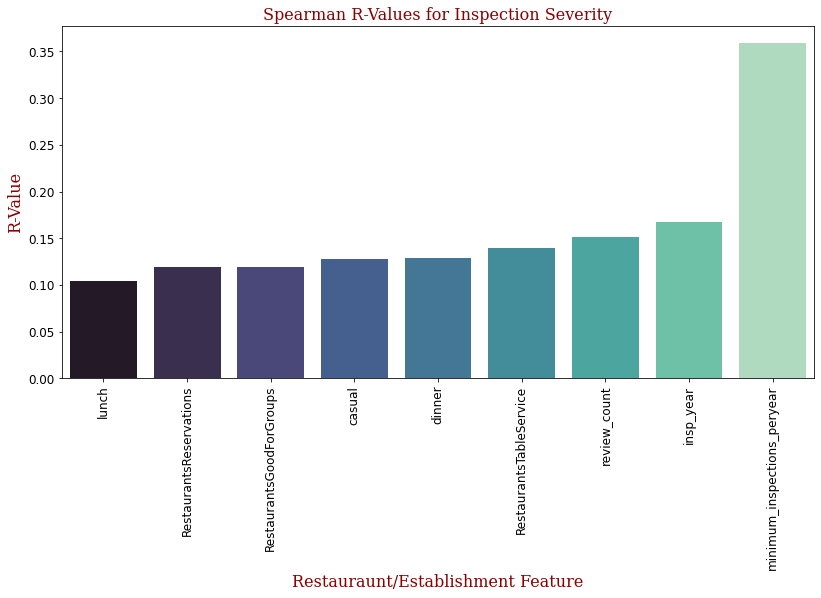

In [33]:
sns.barplot(x=list(r_values_data.keys()), y=list(r_values_data.values()), palette="mako")
sns.color_palette("rocket")
plt.title('Spearman R-Values for Inspection Severity', fontdict=font)
plt.xlabel('Restauraunt/Establishment Feature', fontdict=font)
plt.ylabel('R-Value', fontdict=font)
# plt.figtext(0.995, 0.01, u'Acme designs 2015', ha='right', va='bottom')
plt.tight_layout()
plt.xticks(rotation=90, fontsize=12);
plt.yticks(fontsize=12);


### Establishment Type - Analysis

In [34]:
data['infraction'] = np.where(data['severity']=='NA - Not Applicable',0,1)

In [35]:
establishment_groups =data.groupby('establishment_type')

In [36]:
data['establishment_type'].value_counts();

In [37]:
insp_count_est_type =establishment_groups.count()['infraction']
insp_count_est_type

establishment_type
Bake Shop                                     22
Bakery                                       157
Banquet Facility                              26
Boarding / Lodging Home - Kitchen              5
Brew Your Own Beer / Wine                      5
Butcher Shop                                  43
Cafeteria                                     12
Cafeteria - Public Access                     13
Chartered Cruise Boats                         1
Cheese Plant                                   1
Child Care - Catered                           9
Child Care - Food Preparation                  4
Church Banquet Facility                        1
Cocktail Bar / Beverage Room                  39
College/University Food services               2
Commissary                                     2
Community Kitchen Meal Program                 5
Fish Shop                                     14
Food Bank                                      1
Food Cart                                      3
F

In [38]:
inf_count_est_type =establishment_groups.sum()['infraction']
inf_count_est_type

establishment_type
Bake Shop                                     11
Bakery                                        92
Banquet Facility                              14
Boarding / Lodging Home - Kitchen              0
Brew Your Own Beer / Wine                      3
Butcher Shop                                  23
Cafeteria                                      5
Cafeteria - Public Access                      4
Chartered Cruise Boats                         0
Cheese Plant                                   1
Child Care - Catered                           3
Child Care - Food Preparation                  2
Church Banquet Facility                        1
Cocktail Bar / Beverage Room                  18
College/University Food services               0
Commissary                                     1
Community Kitchen Meal Program                 1
Fish Shop                                      8
Food Bank                                      0
Food Cart                                      2
F

In [39]:
insp_count_est_type.index.values
est_types = { 'insp_count' : pd.Series(insp_count_est_type, index =insp_count_est_type.index.values ),\
            'inf_count': pd.Series(inf_count_est_type,index =insp_count_est_type.index.values  )}

In [40]:
df_est_types = pd.DataFrame(est_types)
df_est_types

,insp_count,inf_count
Bake Shop,22,11
Bakery,157,92
Banquet Facility,26,14
Boarding / Lodging Home - Kitchen,5,0
Brew Your Own Beer / Wine,5,3
Butcher Shop,43,23
Cafeteria,12,5
Cafeteria - Public Access,13,4
Chartered Cruise Boats,1,0
Cheese Plant,1,1


In [41]:
df_est_types['inf_count'] = pd.to_numeric(df_est_types['inf_count'], errors ='coerce')
df_est_types['insp_count'] = pd.to_numeric(df_est_types['insp_count'], errors ='coerce')

In [42]:
df_est_types['No_inf_count'] = df_est_types['insp_count'] -df_est_types['inf_count']

In [43]:
df_est_types['inf_prop'] = df_est_types['inf_count']/df_est_types['insp_count']

In [44]:
df_est =df_est_types[df_est_types['insp_count']> 20]

In [45]:
df_est_types.loc['Bake Shop', 'inf_count']

11

In [46]:
total_insp =df_est_types['insp_count'].sum()

In [47]:
df_est['p']=''
df_est['chi2']=''

In [48]:
total_inf =df_est_types['inf_count'].sum()

In [49]:
no_inf_total = total_insp -total_inf

In [50]:
for i in df_est.index:
    inf_c = df_est.loc[i,'inf_count']
    insp_c = df_est.loc[i, 'No_inf_count']
    chi2, p, dof, exp =stats.chi2_contingency([[inf_c,insp_c],[total_inf,no_inf_total]])
    df_est.loc[i, 'p'] =p
    df_est.loc[i,'chi2'] =chi2

In [51]:
df_est[['p','chi2']][df_est['p']<0.05]

,p,chi2
Food Store (Convenience / Variety),3.36627e-19,80.2102
Food Take Out,0.000357298,12.7432
Restaurant,0.000218177,13.6677


In [52]:
df_est.style.background_gradient(cmap="Blues")


,insp_count,inf_count,No_inf_count,inf_prop,p,chi2
Bake Shop,22,11,11,0.500000,0.659476,0.194161
Bakery,157,92,65,0.585987,0.740133,0.110010
Banquet Facility,26,14,12,0.538462,0.904760,0.014316
Butcher Shop,43,23,20,0.534884,0.763314,0.090681
Cocktail Bar / Beverage Room,39,18,21,0.461538,0.232662,1.424510
Food Court Vendor,129,79,50,0.612403,0.376149,0.783249
Food Processing Plant,21,12,9,0.571429,0.839702,0.040915
Food Store (Convenience / Variety),262,75,187,0.286260,0.000000,80.210191
Food Take Out,818,411,407,0.502445,0.000357,12.743239
Restaurant,3785,2301,1484,0.607926,0.000218,13.667682


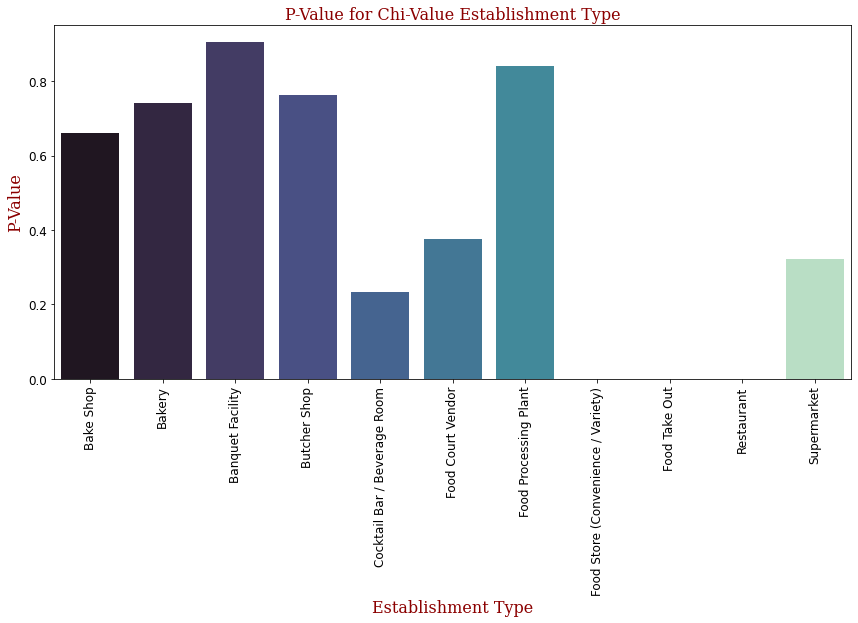

In [53]:
sns.barplot(x=list(df_est.index), y=list(df_est['p']), palette="mako")
sns.color_palette("rocket")
plt.title('P-Value for Chi-Value Establishment Type', fontdict=font)
plt.xlabel('Establishment Type', fontdict=font)
plt.ylabel('P-Value', fontdict=font)
# plt.figtext(0.995, 0.01, u'Acme designs 2015', ha='right', va='bottom')
plt.tight_layout()
plt.xticks(rotation=90, fontsize=12);
plt.yticks(fontsize=12);

### Neighborhood - Analysis

In [54]:
neigborhood_groups =data.groupby('neighborhood')

In [55]:
insp_count_neighb =neigborhood_groups.count()['infraction']
insp_count_neighb

neighborhood
Alexandra Park           31
Bayview Village           7
Beaconsfield Village     28
Bickford Park            29
Bloor-West Village       42
                       ... 
Willowdale              154
Wychwood                 37
Yonge and Eglinton       85
Yonge and St. Clair      18
Yorkville                81
Name: infraction, Length: 72, dtype: int64

In [56]:
inf_count_neighb =neigborhood_groups.sum()['infraction']

In [57]:
insp_count_neighb.index.values
neighbs = { 'insp_count' : pd.Series(insp_count_neighb, index =insp_count_neighb.index.values ),\
            'inf_count': pd.Series(inf_count_neighb,index =insp_count_neighb.index.values  )}

In [58]:
df_neighbs = pd.DataFrame(neighbs)

In [59]:
df_neighbs

,insp_count,inf_count
Alexandra Park,31,12
Bayview Village,7,6
Beaconsfield Village,28,14
Bickford Park,29,20
Bloor-West Village,42,16
...,...,...
Willowdale,154,117
Wychwood,37,17
Yonge and Eglinton,85,51
Yonge and St. Clair,18,15


In [60]:
df_neighbs['inf_prop'] = df_neighbs['inf_count']/df_neighbs['insp_count']

In [61]:
df_neighbs['No_inf_count'] = df_neighbs['insp_count'] -df_neighbs['inf_count']

In [62]:
df_neighbs.shape

(72, 4)

In [63]:
df_n =df_neighbs[df_neighbs['insp_count']> 20]

In [64]:
df_n['p']=''
df_n['chi2']=''

In [65]:
for i in df_n.index:
    inf_c = df_n.loc[i,'inf_count']
    insp_c = df_n.loc[i, 'No_inf_count']
    chi2, p, dof, exp =stats.chi2_contingency([[inf_c,insp_c],[total_inf,no_inf_total]])
    df_n.loc[i, 'p'] =p
    df_n.loc[i,'chi2'] =chi2

In [66]:
df_n.style.background_gradient(cmap="Reds")


,insp_count,inf_count,inf_prop,No_inf_count,p,chi2
Alexandra Park,31,12,0.387097,19,0.062573,3.467835
Beaconsfield Village,28,14,0.500000,14,0.583182,0.301119
Bickford Park,29,20,0.689655,9,0.264245,1.246381
Bloor-West Village,42,16,0.380952,26,0.021427,5.291764
Bloordale Village,25,20,0.800000,5,0.033892,4.500129
Brockton Village,36,22,0.611111,14,0.737861,0.112015
Cabbagetown,31,24,0.774194,7,0.034430,4.473222
Chinatown,81,62,0.765432,19,0.000610,11.744552
Church-Wellesley Village,102,65,0.637255,37,0.203849,1.614585
Corktown,65,41,0.630769,24,0.385787,0.752181


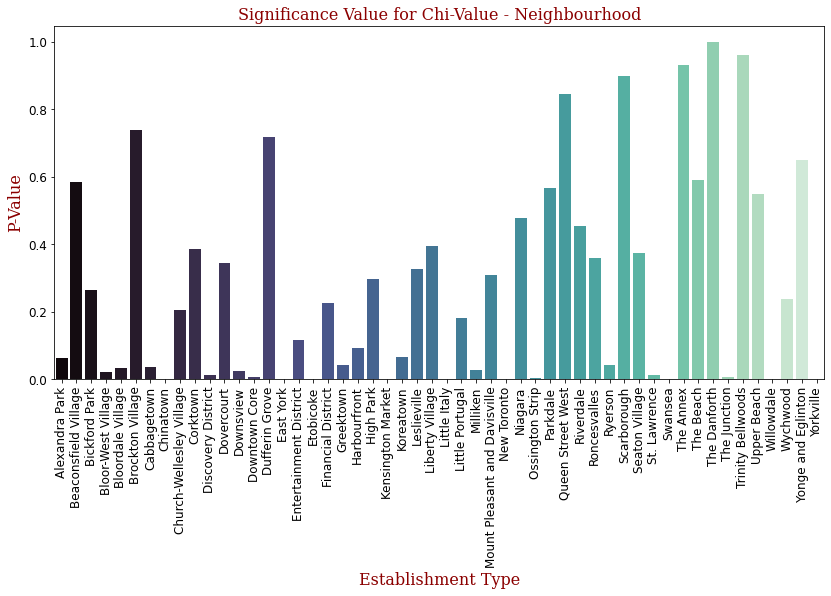

In [68]:
sns.barplot(x=list(df_n.index), y=list(df_n['p']), palette="mako")
sns.color_palette("rocket")
plt.title('Significance Value for Chi-Value - Neighbourhood', fontdict=font)
plt.xlabel('Establishment Type', fontdict=font)
plt.ylabel('P-Value', fontdict=font)
# plt.figtext(0.995, 0.01, u'Acme designs 2015', ha='right', va='bottom')
plt.tight_layout()
plt.xticks(rotation=90, fontsize=12);
plt.yticks(fontsize=12);